# DESAFIO 8: Data Storytelling

Recolección de datos, hasta el 7 de marzo de 2021, sobre COVID en 50 estados de EE.UU., el Distrito de Columbia y 5 territorios de EE.UU, extraidos desde la API de "The COVID Tracking Project"

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
url = "https://api.covidtracking.com/v1/us/daily.json"
df = requests.get(url)
print(df)

<Response [200]>


In [4]:
# Transformar a json
json_data = json.loads(df.text)

# Crear dataframe
data = pd.DataFrame.from_dict(json_data)
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [6]:
# Transformar fecha a formato date
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 420 entries, 0 to 419
Series name: date
Non-Null Count  Dtype         
--------------  -----         
420 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.4 KB


In [7]:
# Valores nulos
data.isnull().sum()

date                          0
states                        0
positive                      1
negative                     48
pending                      51
hospitalizedCurrently        64
hospitalizedCumulative       51
inIcuCurrently               73
inIcuCumulative              72
onVentilatorCurrently        72
onVentilatorCumulative       79
dateChecked                   0
death                        28
hospitalized                 51
totalTestResults              0
lastModified                  0
recovered                   420
total                         0
posNeg                        0
deathIncrease                 0
hospitalizedIncrease          0
negativeIncrease              0
positiveIncrease              0
totalTestResultsIncrease      0
hash                          0
dtype: int64

In [8]:
# Reemplazar los valores nulos por 0
data.fillna(0, inplace=True)

## Visualización

Las personas hospitalizadas y las personas fallecidas por COVID-19, son dos grupos distintos pero interrelacionados.

Las personas hospitalizadas son aquellas que han sido diagnosticadas con COVID-19 y han sido admitidas en un hospital para recibir tratamiento médico. Estas personas pueden tener síntomas leves, moderados o graves de la enfermedad. 

Por otro lado, las personas fallecidas son aquellas que han muerto debido a complicaciones relacionadas con COVID-19. Las complicaciones más graves de COVID-19 incluyen insuficiencia respiratoria, neumonía, sepsis y fallo multiorgánico. Las personas con mayores riesgos de complicaciones graves incluyen personas mayores, personas con afecciones médicas preexistentes como enfermedad cardiovascular, diabetes o enfermedad pulmonar, y personas con sistemas inmunológicos comprometidos.

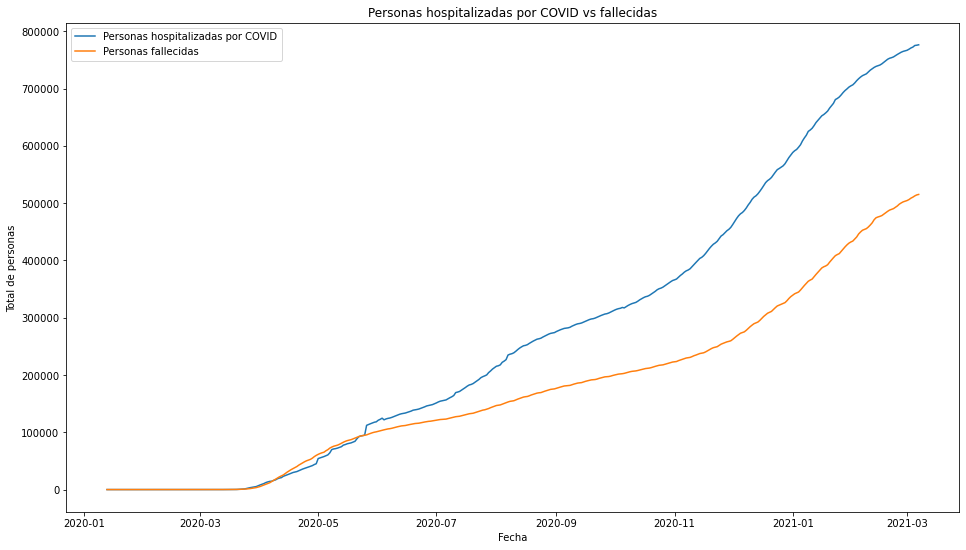

In [9]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(data['date'], data['hospitalized'],
        label='Personas hospitalizadas por COVID')
ax.plot(data['date'], data['death'], label='Personas fallecidas')
ax.set_xlabel('Fecha')
ax.set_ylabel('Total de personas')
ax.set_title('Personas hospitalizadas por COVID vs fallecidas')
ax.legend()
plt.show()

Es importante destacar que no todas las personas hospitalizadas fallecen y que muchas personas infectadas con COVID-19 se recuperan sin necesidad de ser hospitalizadas. La tasa de mortalidad de COVID-19 varía según la edad, la salud general y otros factores de riesgo.

Al estudiar el gráfico vemos que la tasa de mortalidad de las personas ha disminuido, en el último tiempo, en comparación con la cantidad de personas hospitalizadas, ésto puede deberse a la administración de vacunas, los protocolos de prevención y protección de los grupos de riesgo.

Las personas hospitalizadas con síntomas graves de COVID-19 pueden necesitar oxígeno suplementario, ventilación mecánica u otros tratamientos intensivos en una unidad de cuidados intensivos (UCI).

In [20]:
# Agrupar por año
temp = data.groupby(data['date'].dt.to_period('Y')).sum()
uci_ventilator = temp[['inIcuCumulative', 'onVentilatorCumulative']]


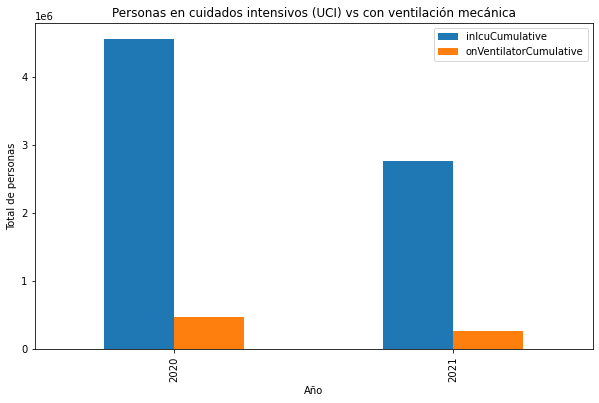

In [27]:
ax = uci_ventilator.plot.bar(figsize=(10, 6))
ax.set_xlabel('Año')
ax.set_ylabel('Total de personas')
ax.set_title('Personas en cuidados intensivos (UCI) vs con ventilación mecánica')
ax.legend()
plt.show()

Al estudiar el gráfico vemos que las internaciones en cuidados intensivos y la utilización de ventilación mecánica también a disminuido en comparación con las primeras etapas de la pandemia.